# Compare CanRCM4 winds to SandHead winds

In [11]:
#import required libraries

import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np

In [2]:
sandheads = pd.read_csv('SH_total_31Dec2020.dat', names=['Day', 'Month', 'Year', 'Hour', 'North/South', 'East/West'], sep='\s+')
sandheads['datetime'] = pd.to_datetime(sandheads.drop(columns=['North/South', 'East/West']))
sandheads = sandheads.set_index('datetime')
sandheads = sandheads.drop(columns=['Day', 'Month', 'Year', 'Hour'])
sandheads = sandheads['2014-01-01 00:00:00':]
sandheads = sandheads.resample('D').mean()

# U_sandheads = sandheads['East/West'].to_numpy()
# V_sandheads = sandheads['North/South'].to_numpy()

In [3]:
V_sandheads = sandheads['North/South'].to_numpy()
U_sandheads = sandheads['East/West'].to_numpy()

In [4]:
RCM_Uwind = pd.read_csv('RCM_Uwinds.csv',header=None).to_numpy()
RCM_Vwind = pd.read_csv('RCM_Uwinds.csv').to_numpy()
RCM_lat = pd.read_csv('RCM_lat.csv').to_numpy()
RCM_lon = pd.read_csv('RCM_lon.csv').to_numpy()
dates = pd.read_csv('RCM_dates.csv')

In [5]:
#pick which point you want to use based on closeness to sandheads lat and lon
lat = 49.10
lon = -123.30

k = -1
for i in RCM_lat:
    k+=1
    if i > lat and i <(lat+0.1):
        print('lat='+str(k))
        
k=-1
for i in RCM_lon:
    k+=1
    if i > (lon+360) and i <((lon+360.1)):
        print('lon='+str(k))

lat=488
lat=515
lat=516
lat=544
lat=572
lat=599
lat=627
lat=628
lat=655
lat=682
lat=683
lat=710
lat=738
lon=37
lon=103
lon=193
lon=290
lon=386
lon=481
lon=637
lon=728
lon=818
lon=908
lon=995


In [6]:
#did a bit of lazy trial and error and settled on ind 544
RCM_Vwind = RCM_Vwind[544,:]
RCM_Uwind = RCM_Uwind[544,:]

In [13]:
#set dates for both datasets
timeSAND = pd.date_range(start=dt.datetime(2014,1,1),end=dt.datetime(2019,3,28))
timeRCM = pd.date_range(start=dt.datetime(2014,1,1),end=dt.datetime(2020,12,31))
timeRCM = np.delete(timeRCM,[list(timeRCM).index(dt.datetime(2016,2,29)),list(timeRCM).index(dt.datetime(2020,2,29))])

Text(0.5, 1.0, 'Daily average wind speed in the East/West Direction')

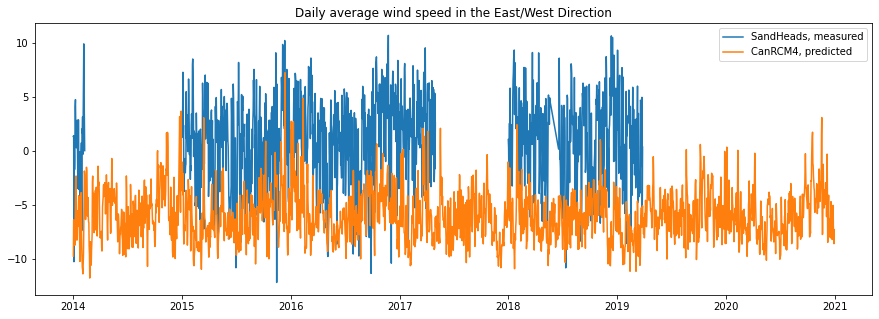

In [20]:
#plot U component
plt.figure(figsize=(15,5))

plt.plot(timeSAND,U_sandheads, label='SandHeads, measured')
plt.plot(timeRCM,RCM_Uwind,label='CanRCM4, predicted')
plt.legend()
plt.title('Daily average wind speed in the East/West Direction')

Text(0.5, 1.0, 'Daily average wind speed in the North/South Direction')

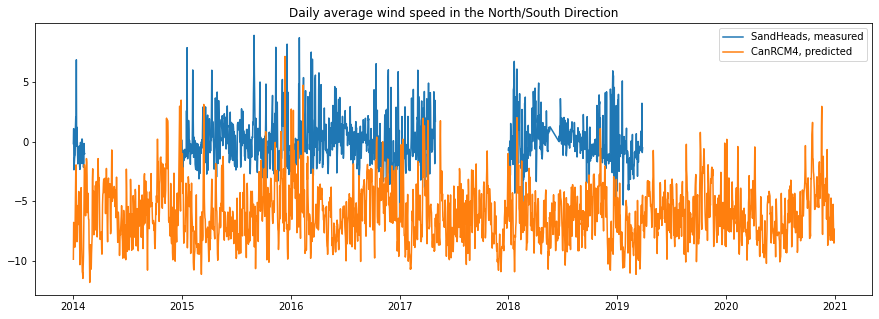

In [21]:
#plot V component
plt.figure(figsize=(15,5))

plt.plot(timeSAND,V_sandheads, label='SandHeads, measured')
plt.plot(timeRCM,RCM_Vwind,label='CanRCM4, predicted')
plt.legend()
plt.title('Daily average wind speed in the North/South Direction')